In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [225]:
data1=pd.read_csv("column_2C_weka.csv")
data2=pd.read_csv("column_3C_weka.csv")

In [226]:
data1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [227]:
data2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [228]:
data1['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [229]:
data2['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [230]:
plt.style.available

['seaborn-muted',
 'fivethirtyeight',
 'seaborn-colorblind',
 'grayscale',
 '_classic_test',
 'seaborn-paper',
 'ggplot',
 'seaborn-poster',
 'seaborn-bright',
 'seaborn-whitegrid',
 'seaborn-ticks',
 'seaborn-deep',
 'seaborn-talk',
 'seaborn-notebook',
 'seaborn-darkgrid',
 'seaborn',
 'seaborn-pastel',
 'seaborn-dark',
 'seaborn-white',
 'seaborn-dark-palette',
 'classic',
 'bmh',
 'dark_background']

In [231]:
plt.style.use('ggplot')

In [232]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [233]:
data1.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


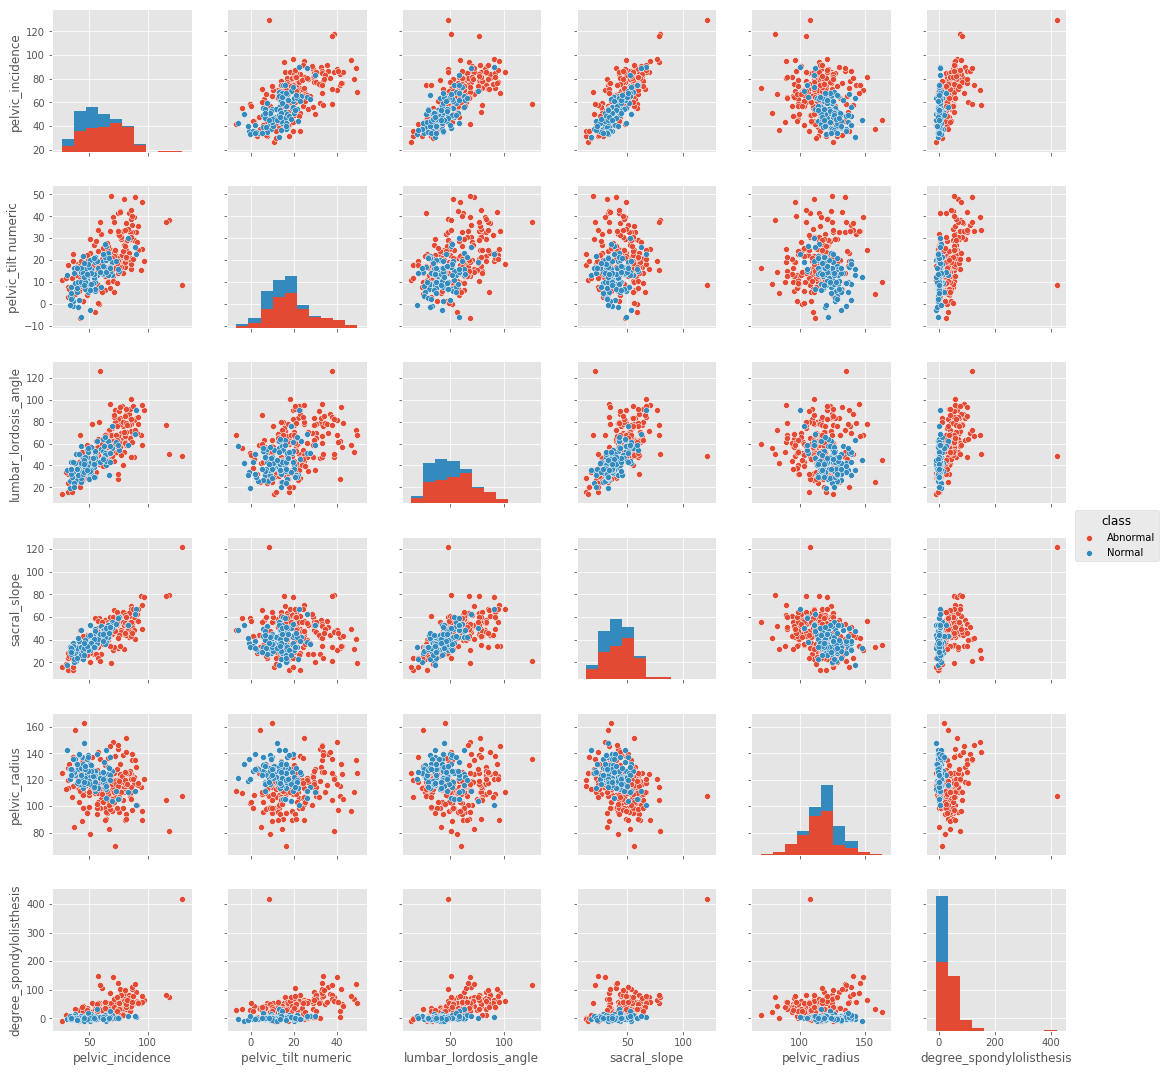

In [234]:
plt.figure()
sns.pairplot(data=data1,hue='class')

In [235]:
from sklearn.preprocessing import LabelEncoder as le
le1=le()
for i in data1.columns:
    le1.fit_transform(data1[i])

In [236]:
col=['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
     'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

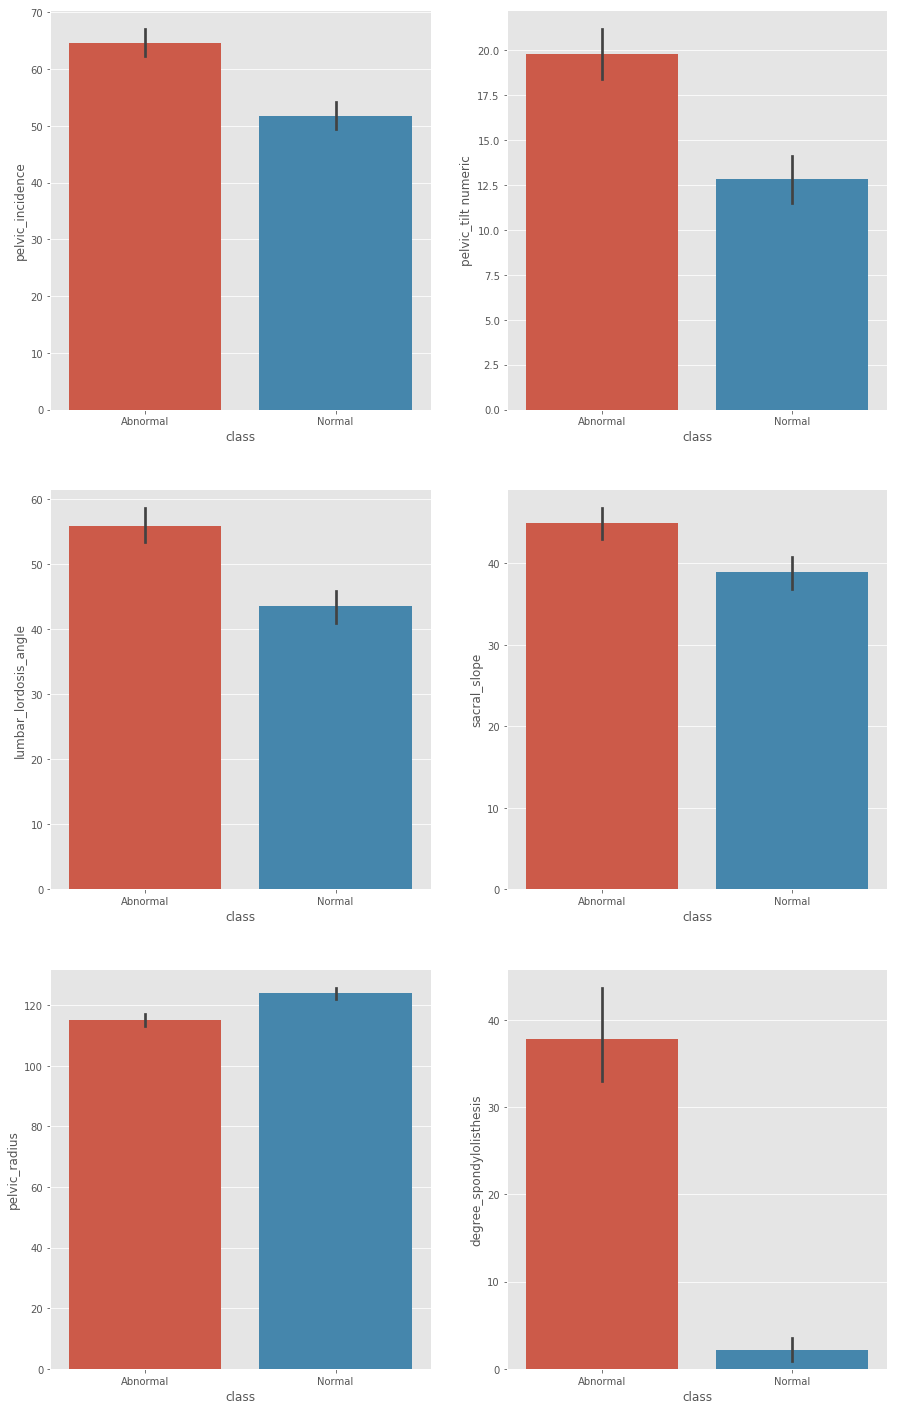

In [237]:
plt.figure(figsize=(15,25))
for i, coll in enumerate(col):
    plt.subplot(3,2,i+1)
    sns.barplot(x='class',y=coll,data=data1)

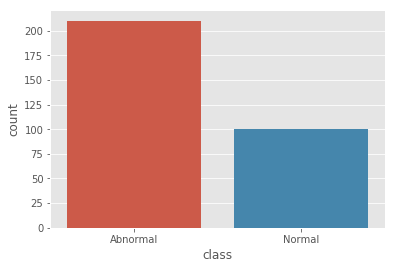

In [238]:
sns.countplot(x='class',data=data1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


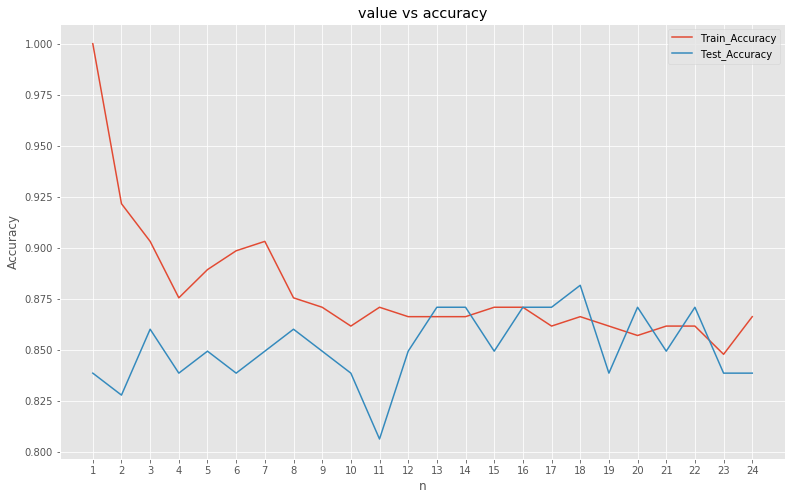

best accuracy is 0.8817204301075269 with k= 18 


In [239]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


neighbor=np.arange(1,25)
train_accuracy=[]
test_accuracy=[]
x=data1.loc[:,data1.columns !='class']
y=data1.loc[:,data1.columns=='class']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
for i,k in enumerate(neighbor):
    
    clf_knn=knn(n_neighbors=k)
    clf_knn.fit(X_train,y_train)
    train_accuracy.append(clf_knn.score(X_train,y_train))
    test_accuracy.append(clf_knn.score(X_test,y_test))    
    
plt.figure(figsize=[13,8])
plt.plot(neighbor,train_accuracy,label='Train_Accuracy')
plt.plot(neighbor,test_accuracy,label='Test_Accuracy')
plt.legend()
plt.title("value vs accuracy")
plt.xlabel("n")
plt.ylabel('Accuracy')
plt.xticks(neighbor)
plt.show()


print("best accuracy is {} with k= {} ".format(np.max(test_accuracy) ,1+ test_accuracy.index(np.max(test_accuracy))))

In [240]:
np.unique(y_pred)

array(['Abnormal', 'Normal'], dtype=object)

In [241]:
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors': np.arange(1,25)}
knn_cv = GridSearchCV (clf_knn,grid,cv=3)
knn_cv.fit(x,y)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [242]:
print("best param ={}".format(knn_cv.best_params_))
print("best score ={}".format(knn_cv.best_score_))

best param ={'n_neighbors': 3}
best score =0.7451612903225806


In [243]:
y_train.shape

(217, 1)

In [244]:
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
se=StandardScaler()
se.fit_transform(X_train)
se.transform(X_test)
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)




print("Accuracy: {}".format(clf.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(clf.best_params_))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Accuracy: 0.8709677419354839
Tuned Model Parameters: {'kernel': 'linear', 'C': 1}


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin